# 6.1.4 Generate Random Latitudes and Longitudes

In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities 

In [22]:
# Import the citipy module 
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

627

# 6.2.6 Get the City Weather Data

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=15b3e1ee412c2a8c1876365b747ac5a6


### Import our dependencies and initialize counters and an empty list that will hold the weather data.
### Loop Through the List of Cities and Build the City URL (Keep adding to previous cell).
### Handle API Request Errors with try-except Blocks

In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | karaul
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mariinskiy posad
Processing Record 10 of Set 1 | tahta
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | eyl
Processing Record 16 of Set 1 | bagdarin
Processing Record 17 of Set 1 | schlitz
Processing Record 18 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 19 of Set 1 | rabo de peixe
Processing Record 20 of Set 1 | 

Processing Record 38 of Set 4 | acapulco
Processing Record 39 of Set 4 | manzil jamil
City not found. Skipping...
Processing Record 40 of Set 4 | opuwo
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | bambanglipuro
Processing Record 43 of Set 4 | grants pass
Processing Record 44 of Set 4 | nyurba
Processing Record 45 of Set 4 | japura
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | darovskoy
Processing Record 48 of Set 4 | revelstoke
Processing Record 49 of Set 4 | majene
Processing Record 50 of Set 4 | shatrovo
Processing Record 1 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 2 of Set 5 | luanda
Processing Record 3 of Set 5 | great falls
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | impfondo
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | port blair
Processing Record 8 of Set 5 | kenai
Processing Record 9 of Set 5 | lolua
City not found. Skipping...
Processing Record 10 of Se

Processing Record 25 of Set 8 | hamada
Processing Record 26 of Set 8 | voyvozh
Processing Record 27 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 28 of Set 8 | morant bay
Processing Record 29 of Set 8 | el reno
Processing Record 30 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 8 | atagay
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | cruzeiro do oeste
Processing Record 34 of Set 8 | odweyne
Processing Record 35 of Set 8 | ruteng
Processing Record 36 of Set 8 | saldanha
Processing Record 37 of Set 8 | morehead
Processing Record 38 of Set 8 | griffith
Processing Record 39 of Set 8 | camalu
Processing Record 40 of Set 8 | itum-kale
Processing Record 41 of Set 8 | pathein
Processing Record 42 of Set 8 | bukene
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | zhuhai
Processing Record 45 of Set 8 | eirunepe
Processing Record 46 of Set 8 | bilibino
Processing Record 47 of

Processing Record 13 of Set 12 | paraiso
Processing Record 14 of Set 12 | loreto
Processing Record 15 of Set 12 | paiho
City not found. Skipping...
Processing Record 16 of Set 12 | alibag
Processing Record 17 of Set 12 | meulaboh
Processing Record 18 of Set 12 | saint-louis
Processing Record 19 of Set 12 | guerrero negro
Processing Record 20 of Set 12 | los llanos de aridane
Processing Record 21 of Set 12 | tecpan
Processing Record 22 of Set 12 | fredericton
Processing Record 23 of Set 12 | kifri
Processing Record 24 of Set 12 | itatskiy
Processing Record 25 of Set 12 | litovko
Processing Record 26 of Set 12 | roebourne
Processing Record 27 of Set 12 | cassilandia
Processing Record 28 of Set 12 | darhan
Processing Record 29 of Set 12 | kieta
Processing Record 30 of Set 12 | temnikov
Processing Record 31 of Set 12 | kuva
City not found. Skipping...
Processing Record 32 of Set 12 | ladario
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | yerbogachen
Processing 

In [39]:
len(cities)

627

# 6.2.7 Create a DataFrame of City Weather Data

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,57.47,72,55,4.94,NZ,2021-07-29 01:22:53
1,Barrow,71.2906,-156.7887,42.82,93,90,16.11,US,2021-07-29 01:22:53
2,Busselton,-33.6500,115.3333,59.09,76,40,25.50,AU,2021-07-29 01:22:54
3,Bluff,-46.6000,168.3333,57.79,70,83,7.52,NZ,2021-07-29 01:22:54
4,Victoria,22.2855,114.1577,89.33,86,96,1.99,HK,2021-07-29 01:20:52
5,Albany,42.6001,-73.9662,68.72,79,25,2.26,US,2021-07-29 01:21:02
6,Mariinskiy Posad,56.1150,47.7180,58.14,67,14,6.06,RU,2021-07-29 01:22:55
7,Tahta,26.7693,31.5021,82.72,30,1,9.44,EG,2021-07-29 01:22:55
8,Hobart,-42.8794,147.3294,52.27,66,40,4.00,AU,2021-07-29 01:20:56
9,Ushuaia,-54.8000,-68.3000,42.46,81,20,4.61,AR,2021-07-29 01:21:22


In [50]:
# Reorder the columns in the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-07-29 01:22:53,-46.1927,168.8643,57.47,72,55,4.94
1,Barrow,US,2021-07-29 01:22:53,71.2906,-156.7887,42.82,93,90,16.11
2,Busselton,AU,2021-07-29 01:22:54,-33.6500,115.3333,59.09,76,40,25.50
3,Bluff,NZ,2021-07-29 01:22:54,-46.6000,168.3333,57.79,70,83,7.52
4,Victoria,HK,2021-07-29 01:20:52,22.2855,114.1577,89.33,86,96,1.99
5,Albany,US,2021-07-29 01:21:02,42.6001,-73.9662,68.72,79,25,2.26
6,Mariinskiy Posad,RU,2021-07-29 01:22:55,56.1150,47.7180,58.14,67,14,6.06
7,Tahta,EG,2021-07-29 01:22:55,26.7693,31.5021,82.72,30,1,9.44
8,Hobart,AU,2021-07-29 01:20:56,-42.8794,147.3294,52.27,66,40,4.00
9,Ushuaia,AR,2021-07-29 01:21:22,-54.8000,-68.3000,42.46,81,20,4.61


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

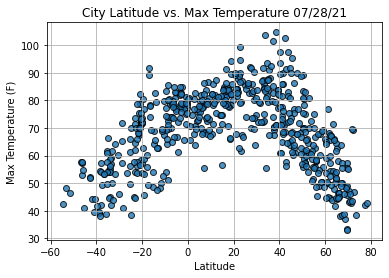

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

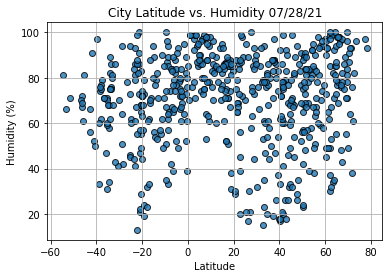

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

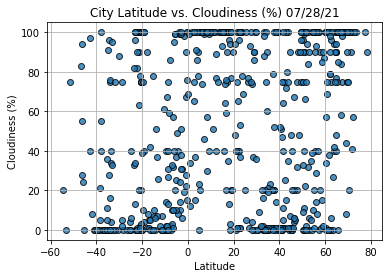

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

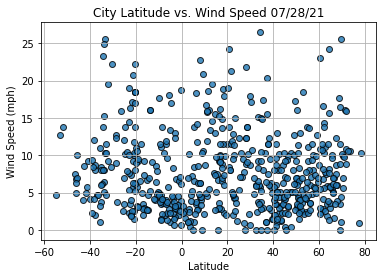

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()